### Design model to predict Attrition rate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('general_data.csv')
masterData=pd.DataFrame(data)

# Describing the dataset
masterData.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [3]:
#Display columns
print(masterData.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [4]:
attritionDataset = masterData[masterData['Attrition']=='Yes']
nonAttritionDatset=masterData[masterData['Attrition']=='No']
#print(attritionDataset.describe())

In [5]:
#Comparing Age
x=attritionDataset['Age'].describe()
y=nonAttritionDatset['Age'].describe()
z=masterData['Age'].describe()
df=pd.concat([z,x,y],axis=1)
df.columns=['All','Arttrition','Non-Arttrition']

print(df)

               All  Arttrition  Non-Arttrition
count  4410.000000  711.000000     3699.000000
mean     36.923810   33.607595       37.561233
std       9.133301    9.675693        8.885956
min      18.000000   18.000000       18.000000
25%      30.000000   28.000000       31.000000
50%      36.000000   32.000000       36.000000
75%      43.000000   39.000000       43.000000
max      60.000000   58.000000       60.000000


In [6]:
#Comparing Salary
x=attritionDataset['MonthlyIncome'].describe()
y=nonAttritionDatset['MonthlyIncome'].describe()
z=masterData['MonthlyIncome'].describe()
df=pd.concat([z,x,y],axis=1)
df.columns=['All','Arttrition','Non-Arttrition']

print(df)

                 All     Arttrition  Non-Arttrition
count    4410.000000     711.000000     3699.000000
mean    65029.312925   61682.616034    65672.595296
std     47068.888559   44792.067695    47472.814021
min     10090.000000   10090.000000    10510.000000
25%     29110.000000   28440.000000    29360.000000
50%     49190.000000   49080.000000    49300.000000
75%     83800.000000   71040.000000    86060.000000
max    199990.000000  198590.000000   199990.000000


In [7]:
#Comparing Gender

x=attritionDataset['Gender'].value_counts()
y=nonAttritionDatset['Gender'].value_counts()
z=masterData['Gender'].value_counts()
df=pd.concat([z,x,y],axis=1)
df.columns=['All','Arttrition','Non-Arttrition']
print(df)
print(df.loc['Male']['Arttrition'])

x_percent=attritionDataset['Gender'].value_counts(normalize=True)*100
y_percent=nonAttritionDatset['Gender'].value_counts(normalize=True)*100
z_percent=masterData['Gender'].value_counts(normalize=True)*100
df_percent=pd.concat([z_percent,x_percent,y_percent],axis=1)
df_percent.columns=['All %','Arttrition %','Non-Arttrition %']
print(df)

         All  Arttrition  Non-Arttrition
Male    2646         441            2205
Female  1764         270            1494
441
         All  Arttrition  Non-Arttrition
Male    2646         441            2205
Female  1764         270            1494


In [8]:
x=attritionDataset['Gender'].value_counts()
print(x.apply(lambda a:a/44.1))

Male      10.000000
Female     6.122449
Name: Gender, dtype: float64


In [57]:
#Comparing BusinessTravel

x=attritionDataset['BusinessTravel'].value_counts()
y=nonAttritionDatset['BusinessTravel'].value_counts()
z=masterData['BusinessTravel'].value_counts()
df=pd.concat([z,x,y],axis=1)
df.columns=['All','Arttrition','Non-Arttrition']

print(df)

x_percent=attritionDataset['BusinessTravel'].value_counts(normalize=True)*100
y_percent=nonAttritionDatset['BusinessTravel'].value_counts(normalize=True)*100
z_percent=masterData['BusinessTravel'].value_counts(normalize=True)*100
df_percent=pd.concat([z_percent,x_percent,y_percent],axis=1)
df_percent.columns=['All %','Arttrition %','Non-Arttrition %']
#gender_percent

print(df_percent)

                    All  Arttrition  Non-Arttrition
Travel_Rarely      3129         468            2661
Travel_Frequently   831         207             624
Non-Travel          450          36             414
                       All %  Arttrition %  Non-Arttrition %
Travel_Rarely      70.952381     65.822785         71.938362
Travel_Frequently  18.843537     29.113924         16.869424
Non-Travel         10.204082      5.063291         11.192214


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001428EF37608>]],
      dtype=object)

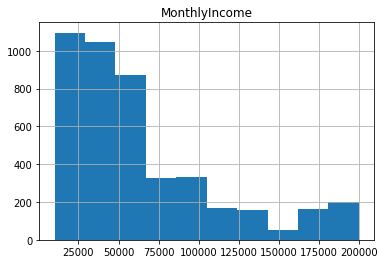

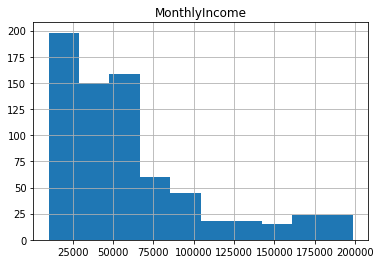

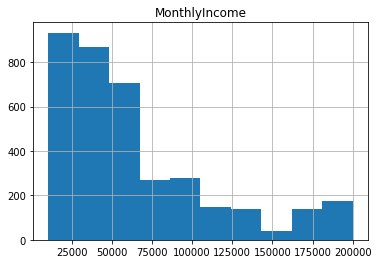

In [11]:
masterData.hist(column="MonthlyIncome");
attritionDataset.hist(column="MonthlyIncome")
nonAttritionDatset.hist(column="MonthlyIncome")

#Inference - Skewness +ve, 